In [8]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json("final-data.json")
df


,text,license
0,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0
1,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0
2,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0
3,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0
4,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0
...,...,...
10255,"Copyright (c) 2015, divsense <> Permission to ...",ISC
10256,AFL-2.0 Copyright 2017 Yu-An Lin,AFL-2.0
10257,the academic free license v.2.1 this academic ...,AFL-2.0
10258,AFL-2.0 Copyright 2017 Yu-An Lin,AFL-2.0


In [3]:
license_df = df['license'].value_counts().to_frame('count').rename_axis('license').reset_index()
license_df


,license,count
0,ECL-2.0,182
1,GPL-3.0-only,182
2,UPL-1.0,181
3,CC-BY-NC-4.0,176
4,EPL-1.0,175
...,...,...
129,ODC-By-1.0,1
130,GPL-3.0-with-autoconf-exception,1
131,bzip2-1.0.6,1
132,AFL-3.0,1


In [4]:
unique_license_list = license_df.license.unique().tolist()
id2Label = {str(i): label for i, label in enumerate(unique_license_list)}
label2id = {label: i for i, label in enumerate(unique_license_list)}

In [14]:
license_df = df['license'].value_counts().to_frame('count').rename_axis('license').reset_index()
license_df

,license,count
0,ECL-2.0,182
1,GPL-3.0-only,182
2,UPL-1.0,181
3,CC-BY-NC-4.0,176
4,EPL-1.0,175
...,...,...
129,ODC-By-1.0,1
130,GPL-3.0-with-autoconf-exception,1
131,bzip2-1.0.6,1
132,AFL-3.0,1


In [12]:
df["license_id"] = df.license.apply(lambda x: label2id[x])
df

,text,license,license_id
0,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0,106
1,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0,106
2,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0,106
3,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0,106
4,Attribution-NonCommercial-NoDerivs 2.0 Copyrig...,CC-BY-NC-ND-2.0,106
...,...,...,...
10255,"Copyright (c) 2015, divsense <> Permission to ...",ISC,77
10256,AFL-2.0 Copyright 2017 Yu-An Lin,AFL-2.0,115
10257,the academic free license v.2.1 this academic ...,AFL-2.0,115
10258,AFL-2.0 Copyright 2017 Yu-An Lin,AFL-2.0,115


In [16]:
# add license_id to license_df dataframe
license_df["license_id"] = license_df.license.apply(lambda x: label2id[x])
license_df

,license,count,license_id
0,ECL-2.0,182,0
1,GPL-3.0-only,182,1
2,UPL-1.0,181,2
3,CC-BY-NC-4.0,176,3
4,EPL-1.0,175,4
...,...,...,...
129,ODC-By-1.0,1,129
130,GPL-3.0-with-autoconf-exception,1,130
131,bzip2-1.0.6,1,131
132,AFL-3.0,1,132


<Axes: xlabel='license_id', ylabel='count'>

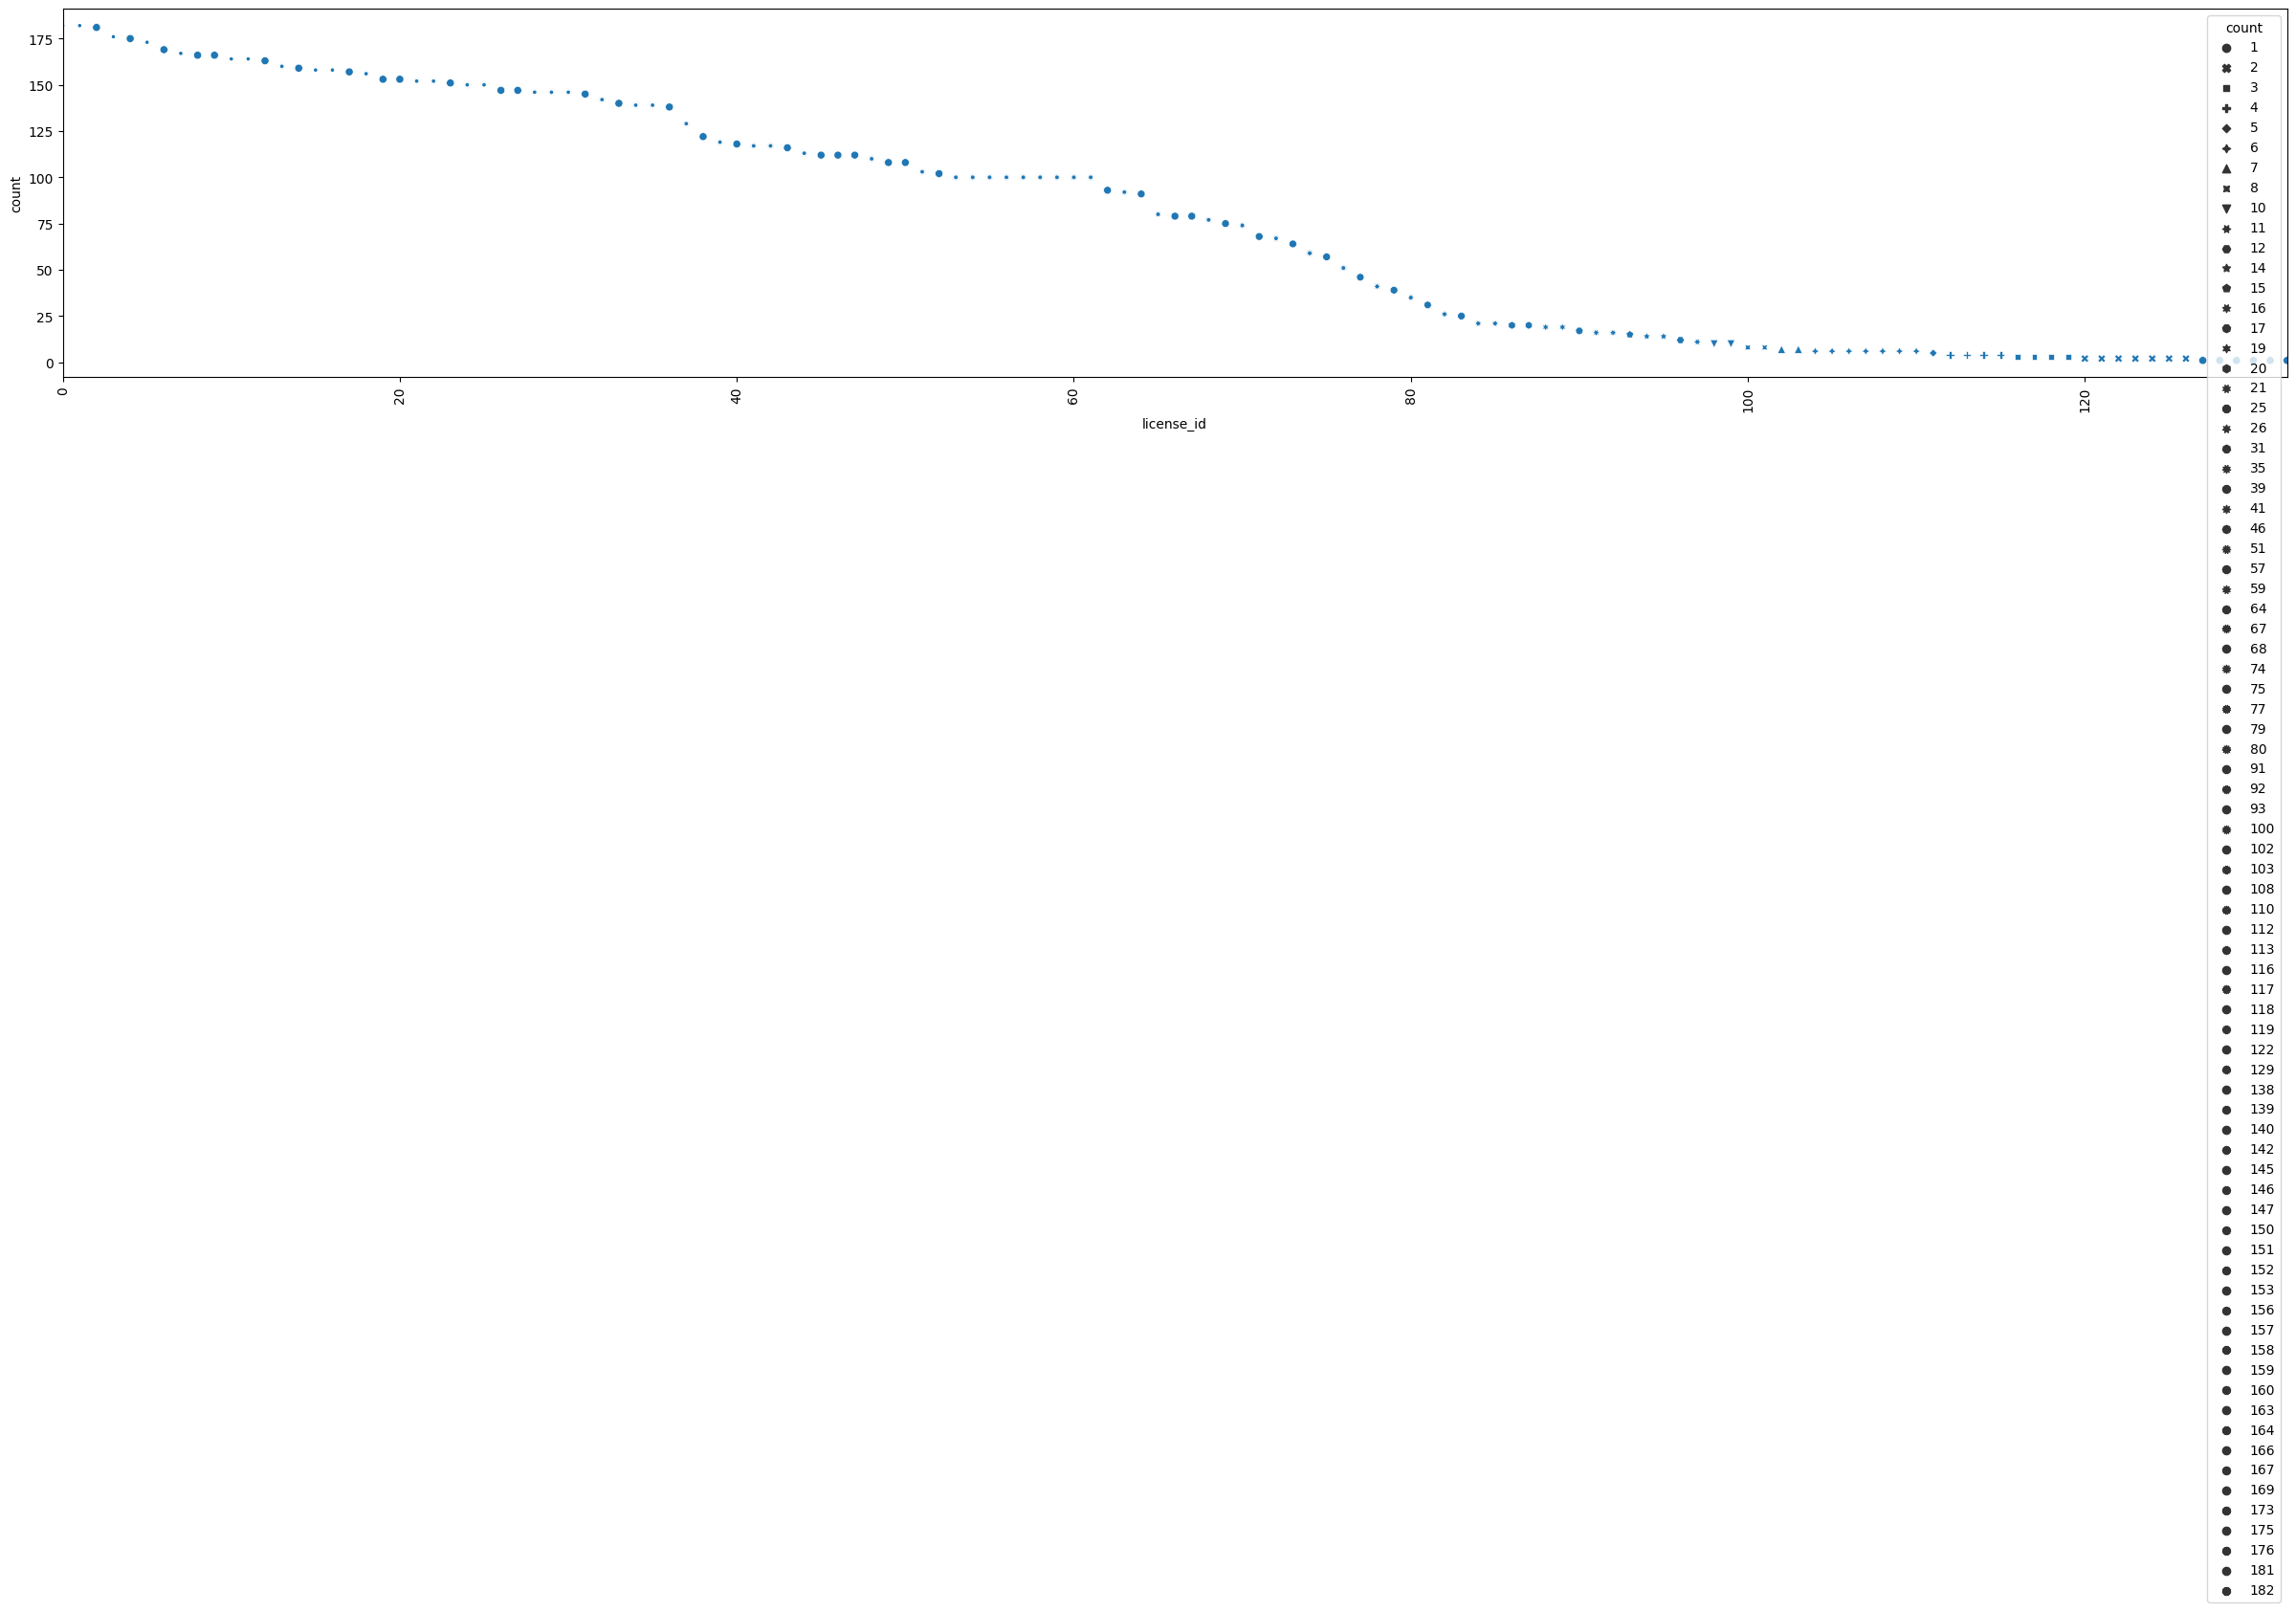

In [24]:
plt.figure(figsize=(30,5))
plt.xlim(0, 132)
plt.xticks(rotation=90)

sns.scatterplot(
    data=license_df,
    x="license_id", y="license_id",
    style="count"
)